# Early Innings Score Predictor – IPL T20

This project analyzes historical IPL data—including player stats, venues, and ball-by-ball events—to predict a team’s final 1st innings score after just the first 4 overs of play.

By learning from past trends, the model aims to forecast the full score early in the game, and is evaluated on unseen match data for real-world effectiveness.

* What the Model Considers:
-- Wickets and balls remaining

-- Current batsmen’s scores

-- Team’s momentum in the first 4 overs

-- Strength of the batting and bowling sides

This data-driven approach enables smarter, faster match predictions—moving beyond run-rate assumptions and toward early, accurate forecasts. 

## DATA COLLECTION:
Kaggle was used to collect the IPL score data. Features are:

mid            -> a unique innings' id

venue          -> ground's name

bat_team       -> Batting Team

bowl_team      -> Bowling Team

batsman        -> Batsman name

bowler         -> Bowler name

runs           -> Runs at that instant

wickets        -> Wickets at that instant

overs          -> Overs completed at that instant

runs_last_5    -> Runs scored in last 5 overs

wickets_last_5 -> Wickets lost in last 5 overs 

striker        -> Striker's score

non-striker    -> Non Striker's score

total          -> Total innings score

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head(3)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222


In [3]:
df.shape

(76014, 15)

### There are 76014 rows and 15 columns in our dataset.

In [4]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

### Above are the name of the columns present in our dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


### These 6 columns have an object-dtpye:

 1.   date      
 2.   venue     
 3.   bat_team  
 4.   bowl_team 
 5.   batsman        
 6.   bowler         

### We'll have to deal with these columns accordingly as we move to the feature engineering step where we'll either transform their format or might even get rid of some of the columns based on our needs w.r.t to our project.

In [6]:
df[['runs', 'wickets', 'overs', 'runs_last_5', 
    'wickets_last_5', 'striker','non-striker', 'total']].corr()

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
runs,1.000000,0.591007,0.938154,0.750565,0.297768,0.594818,0.315422,0.254498
wickets,0.591007,1.000000,0.755240,0.242942,0.693740,0.019712,-0.171962,-0.337343
overs,0.938154,0.755240,1.000000,0.629374,0.382850,0.477508,0.236430,0.022282
runs_last_5,0.750565,0.242942,0.629374,1.000000,0.058672,0.675924,0.501475,0.368253
wickets_last_5,0.297768,0.693740,0.382850,0.058672,1.000000,-0.214576,-0.421250,-0.273475
striker,0.594818,0.019712,0.477508,0.675924,-0.214576,1.000000,0.554439,0.381664
non-striker,0.315422,-0.171962,0.236430,0.501475,-0.421250,0.554439,1.000000,0.293233
total,0.254498,-0.337343,0.022282,0.368253,-0.273475,0.381664,0.293233,1.000000


### Correlation between all the numerical columns along with the target column as well.

In [7]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

### Thus, no column has missing values in our dataset.

## 📌 EXPLORATORY DATA ANALYSIS (EDA) - Part 1
🎯 Understanding the features in our dataset and the meta-data they consist.

This section focuses on analyzing and understanding our independent features.

In [8]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

### Here, we can notice that some teams are mentioned that do not play in ipl consistently such as:

- "Deccan Chargers'
- 'Kochi Tuskers Kerala', 
- 'Pune Warriors'
- 'Rising Pune Supergiants'

Also team 'Rising Pune Supergiant' has been repeated here.

Thus, in feature engineering step we will only pick teams such as 'Chennai Super Kings' & 'Rajasthan Royals' 
who has been playing IPL consistently from the start. 

NOTE: Column [bowl_team] also consists of the same teams.

In [9]:
df.mid.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

### CONCLUSION: 
This column [mid] is useless since each unique number here represents an entire innings i.e. 20 overs ball by ball therefore we'll get rid of it in feat. engg. step.

In [10]:
df.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

### CONCLUSION:

Though Column [venue] plays a crucial role in a cricket match and the score a team builds but since there are too many of it and on OHE it is gonna increase our complexity moving on with this mlops project therefore we'll drop it in this project but u can definitely try and perform analysis based on the venue in a notebook experiment.
 
- Thus, we'll get rid of this column too in feature engineering steps.

In [11]:
df.batsman.value_counts()

batsman
SK Raina          1921
V Kohli           1825
S Dhawan          1730
RG Sharma         1726
MS Dhoni          1584
                  ... 
T Henderson          1
NJ Rimmington        1
LH Ferguson          1
P Parameswaran       1
V Pratap Singh       1
Name: count, Length: 411, dtype: int64

### CONCLUSION:
 Though Column [batsman] & [bowler] might appear to be of use it's of no use for us as we move further to build a 1st innings score predicting application cause we're not gonna need features describing what batsman is playing and which bowler is bowling at a certain point in the match to predict the final innings score.

- Therefore we'll also get rid of these columns cause our goal here is to build a score predictor application.

In [12]:
# coverting the 'date' column into datetime format
df['date'] = pd.to_datetime(df['date'])

# Extracting unique years only
unique_years = df['date'].dt.year.unique()

print(unique_years)

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


### CONCLUSION:

To ensure a realistic and future-focused evaluation, we will split the data based on years. The model will be trained on historical IPL data from 2008 to 2015, and tested on unseen data from the 2016 and 2017 seasons. This temporal split mirrors real-world scenarios and is a better approach than splitting data randomly since it is kinda like a time-series forecasting problem here, where predictions are made using only past information, ensuring the model's performance is measured on genuinely new matches.

## 📌 EXPLORATORY DATA ANALYSIS (EDA) - Part 2
🎯 Understanding our Target Feature: total (Final Runs Scored)

Now that we understand our independent features, this section focuses on analyzing total (runs scored by the batting team) and its relationship with other variables.

1️⃣ Distribution of Total Runs
Plotted histogram & KDE plot to check how total scores are distributed.

Checked for skewness & outliers (Are there too many low scores? Any extreme high score that might not be true?).

2️⃣ Highest & Lowest Scores Analysis
Found highest and lowest total scores and the teams that scored them.

Visualized this using bar plots (sns.barplot()).

3️⃣ Impact of Features on Total Runs

Runs vs Overs Played – How does scoring pattern change over 20 overs?

Striker Performance vs Total – Does having a high-scoring striker impact total score?

4️⃣ Batting & Bowling Performance of Teams

Found which bowling teams concede the highest totals. 

In [13]:
df.total.unique()

array([222, 240, 129, 165, 110, 166, 142, 208, 214, 182, 135, 147, 154,
       158, 178, 137, 191, 164, 196, 169, 162, 109, 126, 144, 103, 187,
       140, 122, 181, 204, 156, 143, 133, 221, 194,  67, 197, 189, 175,
       176, 211, 174, 145, 192, 112, 163, 101, 179, 184, 150, 168, 149,
       139, 119, 148, 141, 153, 105, 116, 157, 123, 173, 120, 160, 134,
       188, 170, 146, 161, 212, 190, 203, 218,  92, 185, 151, 171, 136,
       155, 183, 180, 177, 172, 246, 200, 159, 138, 111, 130, 132,  82,
        95,  81, 118, 195, 231,  94, 205, 125,  97, 232, 152, 198, 128,
       193, 115, 131, 124, 207, 100, 186, 114, 215,  99, 209, 117, 263,
        80, 223, 106,  70, 201, 226, 199, 127, 167, 235, 113, 202, 121,
        98, 227, 248, 206, 213, 230,  73, 107], dtype=int64)

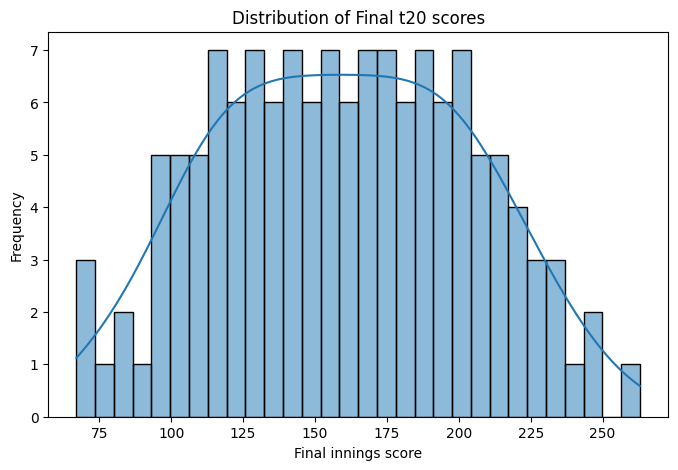

In [14]:
# Distribution of total runs scored and where does the average score might lie
total = pd.DataFrame(df["total"].unique())

plt.figure(figsize=(8, 5))
sns.histplot(total[0], bins=30, kde=True)
plt.title('Distribution of Final t20 scores')
plt.xlabel('Final innings score')
plt.ylabel('Frequency')
plt.show()

### CONCLUSION:

An ipl innings' score is most likely to be in the range of (120-200) runs.

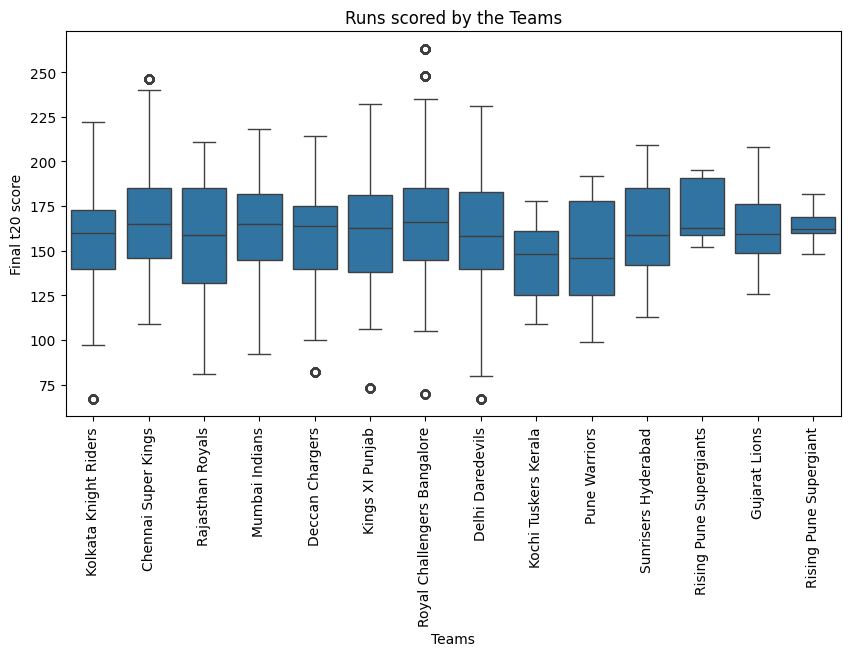

In [15]:
# Showcases each team's usual batting score with some outliers like score i.e. extremely low scores or high

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['bat_team'], y=df['total'])
plt.xticks(rotation=90)  # Rotate for better visibility
plt.title('Runs scored by the Teams')
plt.xlabel('Teams')
plt.ylabel('Final t20 score')
plt.show()

### CONCLUSION:

- Teams such as kkr, DD, and Deccan Charges have scored some extremely low t20 score on rare instances.
- RCB has managed to score both extremely low as well as high totals in a t20 match.

In [16]:
# Highest and lowest total
highest_total = df["total"].max()
lowest_total = df["total"].min()

# Finding the highest total and the team that scored it
highest_total_row = df[df["total"] == df["total"].max()]
highest_team = highest_total_row["bat_team"].values[0]
highest_total = highest_total_row["total"].values[0]

# Finding the lowest total and the team that scored it
lowest_total_row = df[df["total"] == df["total"].min()]
lowest_team = lowest_total_row["bat_team"].values[0]
lowest_total = lowest_total_row["total"].values[0]

# Printing the totals and the team that scored it
print(f"Highest Total: {highest_total} by {highest_team}")
print(f"Lowest Total: {lowest_total} by {lowest_team}")

Highest Total: 263 by Royal Challengers Bangalore
Lowest Total: 67 by Kolkata Knight Riders


Now, visualizing this data 

C:\Users\dell\AppData\Local\Temp\ipykernel_9184\3971460121.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(totals.keys()), y=list(totals.values()), palette=["red", "blue"])


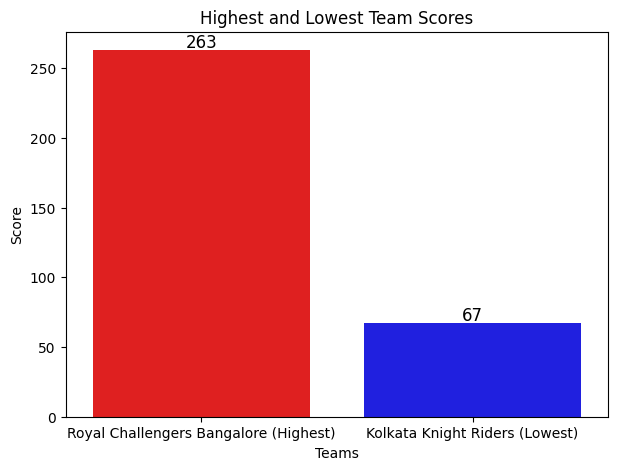

In [17]:
totals = {
    f"{highest_team} (Highest)": highest_total,
    f"{lowest_team} (Lowest)": lowest_total
}

plt.figure(figsize=(7, 5))
sns.barplot(x=list(totals.keys()), y=list(totals.values()), palette=["red", "blue"])

plt.ylabel("Score")
plt.xlabel("Teams")
plt.title("Highest and Lowest Team Scores")

# Display values on top of bars
for index, value in enumerate(totals.values()):
    plt.text(index, value + 2, str(value), ha='center', fontsize=12)

plt.show()

In [18]:
# Comparing each team's highest total they've score v/s highest total they've conceded

highest_total_scored = df.groupby(["bat_team"])["total"].max().reset_index()
highest_total_scored.rename(columns={"bat_team": "TEAM", "total": "Highest-Score"}, inplace=True)

highest_total_conceded = df.groupby(["bowl_team"])["total"].max().reset_index()
highest_total_conceded.rename(columns={"bowl_team": "TEAM", "total": "Highest-Conceded"}, inplace=True)

# Merging both DataFrames on the common column "TEAM"
merged_df = pd.merge(highest_total_scored, highest_total_conceded, on="TEAM", how="inner")

# Displaying the result as a dataframe
merged_df

,TEAM,Highest-Score,Highest-Conceded
0,Chennai Super Kings,246,231
1,Deccan Chargers,214,204
2,Delhi Daredevils,231,222
3,Gujarat Lions,208,248
4,Kings XI Punjab,232,240
5,Kochi Tuskers Kerala,178,182
6,Kolkata Knight Riders,222,209
7,Mumbai Indians,218,235
8,Pune Warriors,192,263
9,Rajasthan Royals,211,246


We can see here that RCB's highest total scored is 263 runs and so it is Pune Warriors highest total conceded indicating that RCB scored those runs against Pune Warriors, and to confirm this conclusion we can visualize it.

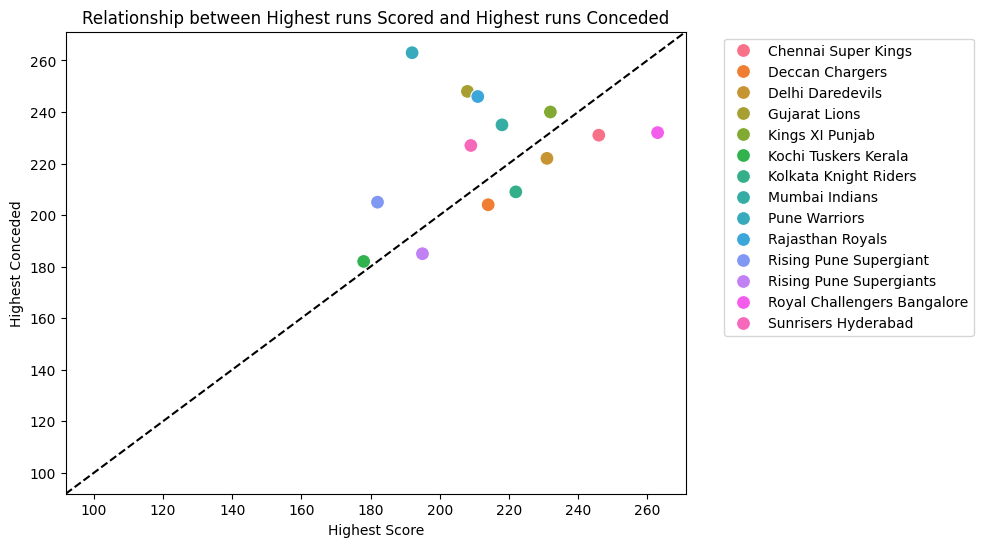

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Highest-Score", y="Highest-Conceded", data=merged_df, hue="TEAM", s=100)

plt.axline((100, 100), slope=1, color="black", linestyle="dashed")  # Reference line (y=x)
plt.xlabel("Highest Score")
plt.ylabel("Highest Conceded")
plt.title("Relationship between Highest runs Scored and Highest runs Conceded")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

 Similarly checkout each team's lowest ipl score according to the dataset available to us


In [20]:
lowest_totals = df.groupby(["bat_team"])["total"].min().reset_index()
lowest_totals.sort_values(by="total",ascending=True)


,bat_team,total
2,Delhi Daredevils,67
6,Kolkata Knight Riders,67
12,Royal Challengers Bangalore,70
4,Kings XI Punjab,73
9,Rajasthan Royals,81
1,Deccan Chargers,82
7,Mumbai Indians,92
8,Pune Warriors,99
0,Chennai Super Kings,109
5,Kochi Tuskers Kerala,109


Therefore Delhi Daredevils and Kolkata Knight Riders are the teams that scored the lowest totals i.e. 67 runs

C:\Users\dell\AppData\Local\Temp\ipykernel_9184\405642104.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="bat_team", y="total", data=team_avg_scores, palette="viridis")


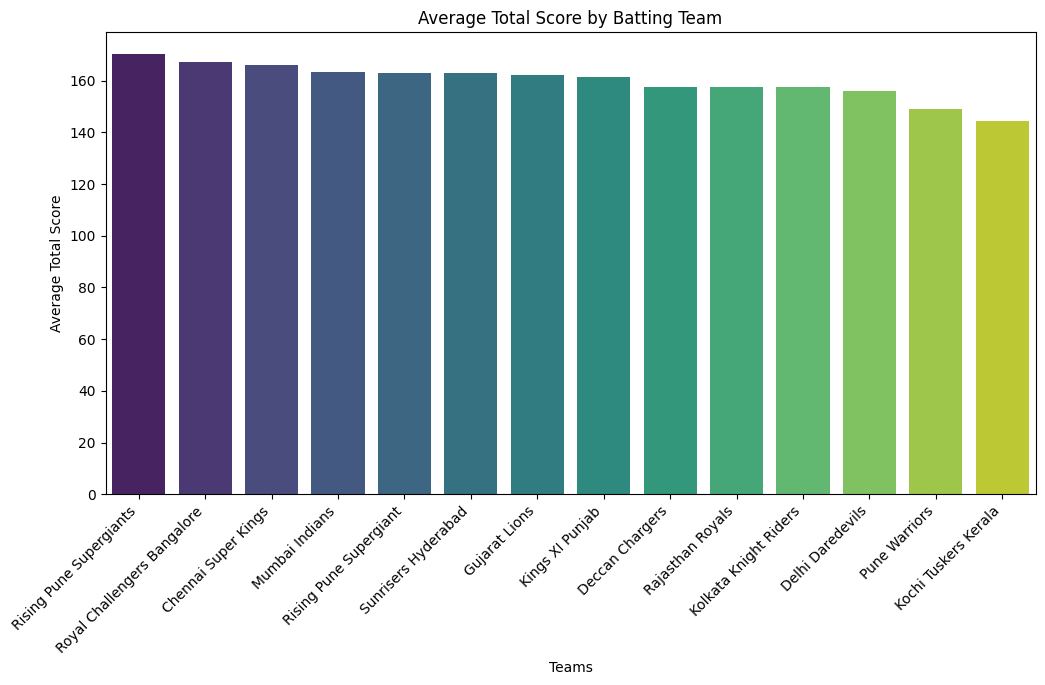

In [21]:
# visualizing team's batting performance based on the average total runs they score each match.

team_avg_scores = df.groupby("bat_team")["total"].mean().reset_index()
team_avg_scores = team_avg_scores.sort_values(by="total", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="bat_team", y="total", data=team_avg_scores, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Total Score")
plt.xlabel("Teams")
plt.title("Average Total Score by Batting Team")
plt.show()

### CONCLUSION:

- Rising Pune Supergiants have the highest total's average among all teams whereas Kochi Tuskers Kerala have the lowest 

    note: this does includes the teams that have not been playing consistently in all ipl seasons. 

C:\Users\dell\AppData\Local\Temp\ipykernel_9184\2023669332.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="bowl_team", y="total", data=team_avg_conceded, palette="magma")


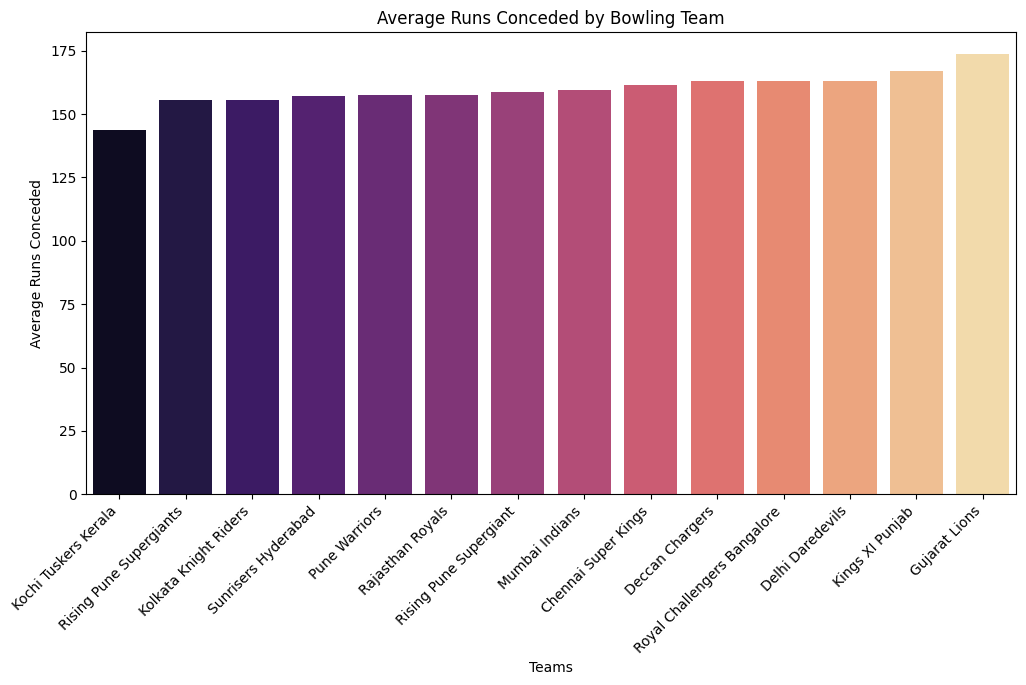

In [22]:
# visualizing team's bowling performance based on the average total runs they conceed each match.

team_avg_conceded = df.groupby("bowl_team")["total"].mean().reset_index()
team_avg_conceded = team_avg_conceded.sort_values(by="total", ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(x="bowl_team", y="total", data=team_avg_conceded, palette="magma")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Runs Conceded")
plt.xlabel("Teams")
plt.title("Average Runs Conceded by Bowling Team")
plt.show()

### CONCLUSION:

- Kochi Tuskers and Rising Pune Supergiants both are in top-2 suggesting;
  - Kochi Tuskers score low scores and manage to conceed low scores as well.
  - Rising Pune Supergiants make big scores and conceed low scores. 
  
   note: this analysis is based on this and the previous visualization of team's avg total. 

Now, we'll see how the following features are correlated to our target variable i.e. 'total'

- 'wickets_last_5' : wickets lost in last 5 overs
- 'wickets'        : wickets lost in an innings
- 'runs_last_5'    : runs scored in the last 5 overs

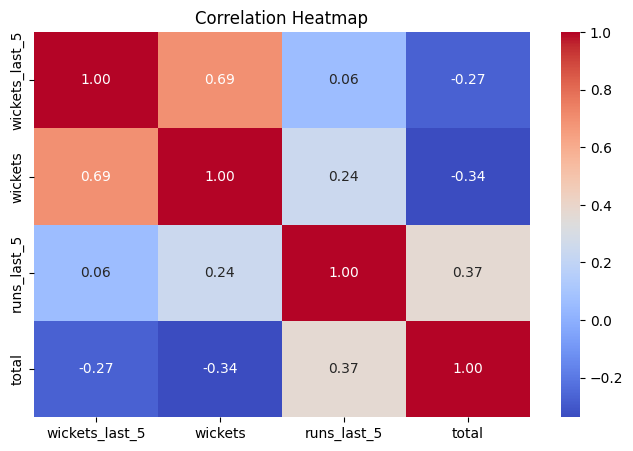

In [23]:
# heatmap describing correlation 

plt.figure(figsize=(8, 5))
sns.heatmap(df[['wickets_last_5',"wickets", 'runs_last_5', 'total']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### CONCLUSION:

- 'wickets lost in last 5 overs' has a negative correlation with the [total] (in simple terms, inversely proportional) 
   and has an extremely small +ve correlation w.r.t the 'runs scored in last 5 overs'.

- 'wickets' also has a negative correlation w.r.t to [total] and a small +ve correlation with 'runs scored in last 5 overs' 
  whereas it is highly correlated to 'wickets lost in last 5 overs'.

- 'runs scored in last 5 overs has a +ve correlation w.r.t the [total].

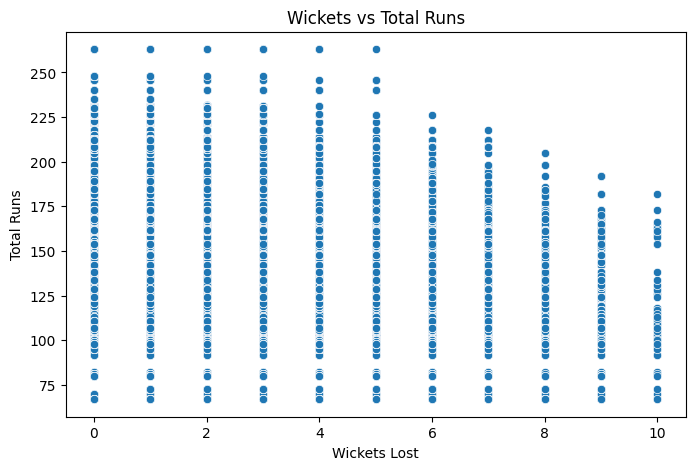

In [24]:
# visualizing relationship between wickets lost in an innings v/s total runs scored

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['wickets'], y=df['total'])
plt.title('Wickets vs Total Runs')
plt.xlabel('Wickets Lost')
plt.ylabel('Total Runs')
plt.show()

### CONCLUSION:

- Teams that has more wickets in hand have scored significantly higher t20 scores than those who lost too many wickets such as 6-8 or 10.

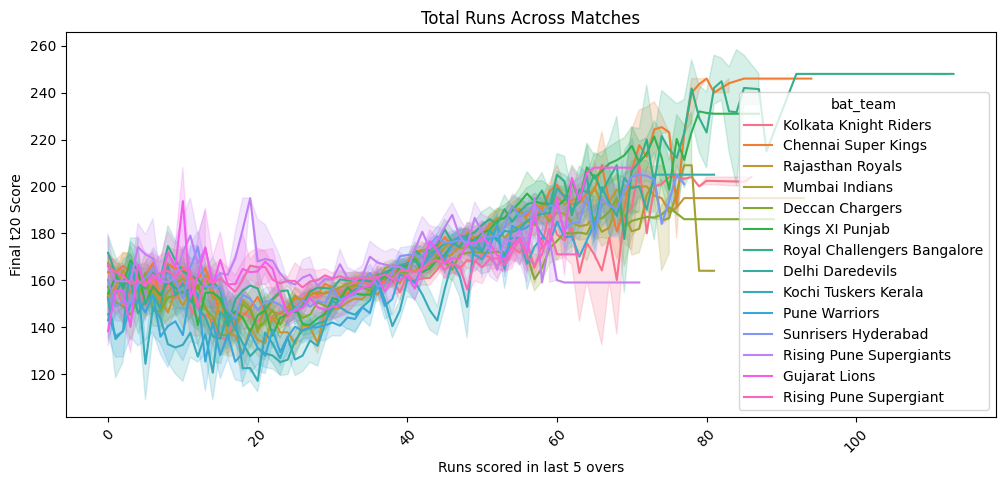

In [25]:
# visualizing relation between Runs Scored in last 5 overs and the Total score

plt.figure(figsize=(12, 5))
sns.lineplot(x=df['runs_last_5'], y=df['total'], hue=df['bat_team'])
plt.xticks(rotation=45)
plt.title('Total Runs Across Matches')
plt.xlabel('Runs scored in last 5 overs')
plt.ylabel('Final t20 Score')
plt.show()

### CONCLUSION:

- Above graph suggests that whenever teams have scored high runs in the last 5 overs such as 60-80 or even 100, they've succeeded in amounting to a massive innings total as high as 240-260s.

- Thus, runs scored in last 5 overs is directly proportional to high total scores.

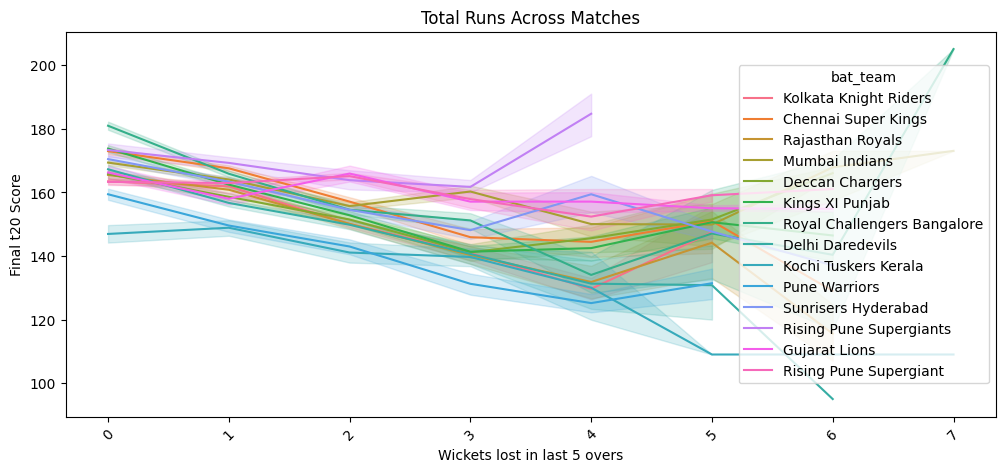

In [26]:
# visualizing relation between Wickets Lost in last 5 overs and the Total score

plt.figure(figsize=(12, 5))
sns.lineplot(x=df['wickets_last_5'], y=df['total'], hue=df['bat_team'])
plt.xticks(rotation=45)
plt.title('Total Runs Across Matches')
plt.xlabel('Wickets lost in last 5 overs')
plt.ylabel('Final t20 Score')
plt.show()

### CONCLUSION:

- We can see that as the no. of wickets lost in last 5 overs increases the innings total score decreases thus demonstrating an inverse relationship between the two.

### We can further make more specific analysis on individual team's performances or a certain player's impact on the teams' total and more as such below:

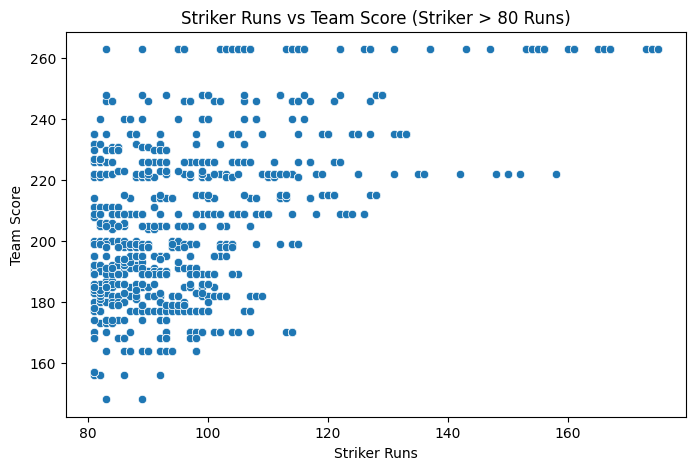

In [27]:
# Filter data where the striker has scored more than 50
df_striker_above_80 = df[df['striker'] > 80]

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_striker_above_80['striker'], y=df_striker_above_80['total'])
plt.title('Striker Runs vs Team Score (Striker > 80 Runs)')
plt.xlabel('Striker Runs')
plt.ylabel('Team Score')
plt.show()

### But our next goal is to preprocess our data and implement feature engineering techniques before training to build our prediction model. 

### Ultimate Conclusion:

- Since this is a basic version of the project and not a fully extensive model incorporating things like weather, pitch conditions, or toss outcomes, we’ll be dropping some columns that aren’t essential. This includes features such as:

-- [mid, venue, batsman, bowler, striker, non-striker]

- In the preprocessing phase, we’ll:

-- We'll also use the date column to split our data into training and testing sets—training on older seasons and testing on newer, unseen matches (e.g., 2016 & 2017).

- After splitting our preprocessed data we'll enter feature engineering stage.

- In the feature engineering phase, we’ll:

-- Encode the remaining categorical features

-- Scale the numerical features

- This streamlined setup helps us focus on core performance while keeping the project clean and manageable.Our end goal is to streamline this project into a full MLOps pipeline, making it ready for automation, scalability, and real-world deployment.

-- Again, the goal here isn't high accuracy but to turn a regression based ml usecase into a production grade mlops project. 